In [1]:
import types

import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

from src.visualization.toy_example import plot_moons, plot_sine
from src.data.toy_example import generate_moons, generate_sine
from src.models.utils import GP_sample

### 1D example

ACCURACY
  -> train: 1.0
  -> test: 1.0
Test GP sampling function

(2, 1000, 734)


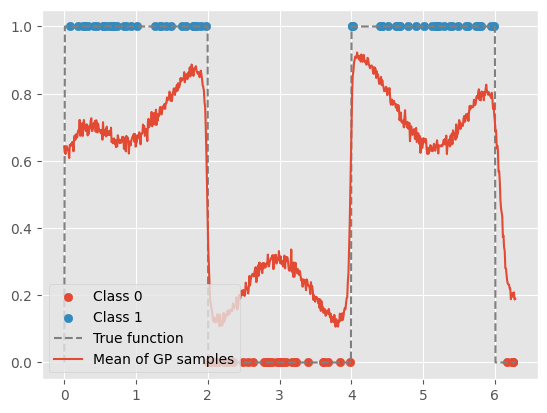

In [2]:
# Define dataset sizes
N_initial   = 100
N_test      = 100
N_pool      = 500
num_classes = 2

# Generate dataset partitions
Xtrain, ytrain, Xtest, ytest, Xpool, ypool, xaxis = generate_sine(N_initial=N_initial, N_test=N_test, N_pool=N_pool)

# Define model
model           = GaussianProcessClassifier(1.0 * RBF(1.0))
model.sample    = types.MethodType( GP_sample, model )

# Train model
model.fit(Xtrain, ytrain)

# Show performance
print(f"ACCURACY\n  -> train: {model.score(Xtrain, ytrain)}\n  -> test: {model.score(Xtest, ytest)}")

print("Test GP sampling function")
_ = model.sample(Xpool[:2], n_samples=10000, seed=0, verbose=True)

# Get samples of output_probs of pool
gp_samples = model.sample(xaxis.reshape(-1,1), n_samples=1000, seed=0, verbose=False)
print(f"\n{gp_samples.shape}")

plot_sine(Xtrain, ytrain, xaxis, gp_samples, N=N_initial + N_test + N_pool)
plt.legend(loc='lower left')
plt.show()

### 2D example

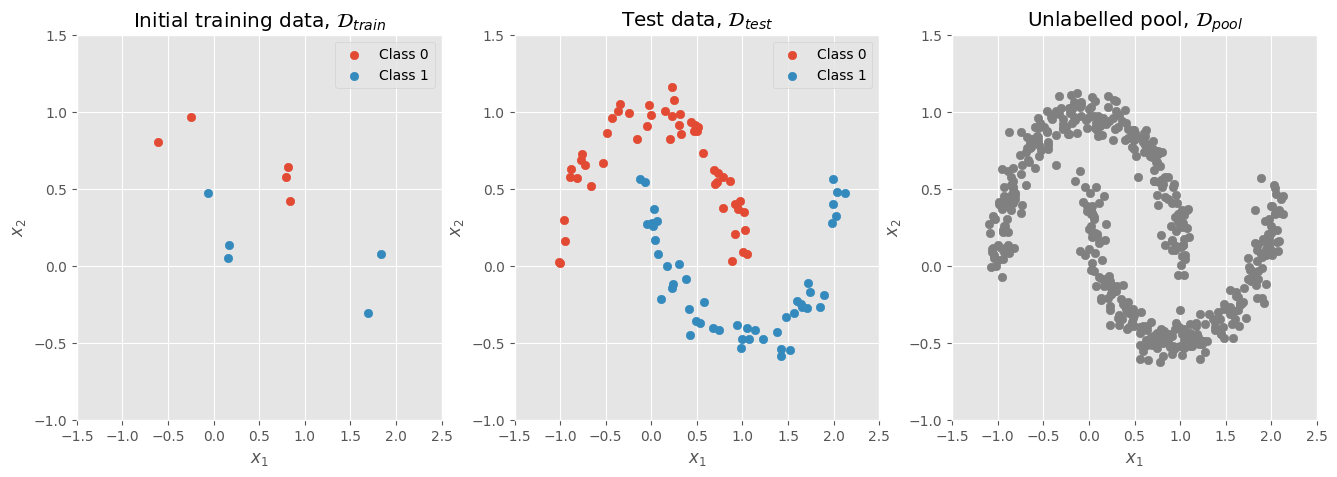

ACCURACY
  -> train: 1.0
  -> test: 1.0
Test GP sampling function

(2, 5, 490)


In [7]:
np.random.seed(0)

# Define dataset sizes
N_initial   = 5
N_test      = 100
N_pool      = 500
num_classes = 2

# Generate dataset partitions
Xtrain, ytrain, Xtest, ytest, Xpool, ypool = generate_moons(N_initial_per_class=N_initial, N_test=N_test, N_pool=N_pool)

# Plot the dataset partitions
plot_moons(Xtrain, ytrain, Xtest, ytest, Xpool, ypool)

# Define model
model           = GaussianProcessClassifier(1.0 * RBF(1.0))
model.sample    = types.MethodType( GP_sample, model )

# Train model
model.fit(Xtrain, ytrain)

# Show performance
print(f"ACCURACY\n  -> train: {model.score(Xtrain, ytrain)}\n  -> test: {model.score(Xtest, ytest)}")

print("Test GP sampling function")
_ = model.sample(Xpool[:2], n_samples=10000, seed=0, verbose=True)

# Get samples of output_probs of pool
sample_probs = model.sample(Xpool, n_samples=5, seed=0)
print(f"\n{sample_probs.shape}")